# Import, Loading and cleaning data 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
pd.set_option('display.max_columns',None)

In [7]:
data = pd.read_csv("/mnt/data/OBF/02_intermediate/preprocessed_oss_counter_all_v3.csv",delimiter ='|')
data = data.sort_values(by=['week_period'])


# Data Analyse
## Sampling & quick overview

In [3]:
data.sample(n=5)

,cell_id,cell_name,date,cell_band,cell_tech,cell_sector,year,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
454734,19774,WBF9774,202123,U2100,3G,S1,2021,202123,BF0977,215.545648,1.095588,0.000000,0.000000,NaN,314.715123,177.405920,11.147379,11.14661,NaN,NaN,0.000000,NaN,NaN,0.0,23
17171,1,LCC8751,202112,L800,4G,S1,2021,202112,BF0875,378.811776,0.000000,48.591748,0.000000,NaN,5301.723275,2079.829798,28.980663,NaN,42.745394,8.479015,1.073592,NaN,NaN,0.0,12
128268,291,KOMBIS1,202137,G900,2G,S1,2021,202137,BF0029,9.580641,4.360369,0.000000,0.142693,0.032725,45.682509,32.409399,NaN,NaN,0.000280,NaN,NaN,71.128721,0.000273,1.0,37
17184,1,LCC8751,202125,L800,4G,S1,2021,202125,BF0875,464.292640,0.000000,55.580940,0.000000,NaN,2744.447614,1239.673988,38.237889,NaN,57.355627,11.422830,2.396534,NaN,NaN,0.0,25
240291,8582,SOMG52,202152,G900,2G,S2,2021,202152,BF0858,2.974917,0.653658,0.000000,0.000000,0.000000,0.000000,33.279935,NaN,NaN,0.001609,NaN,NaN,1.827747,0.001644,1.0,52


In [4]:
data.drop(['cell_id','cell_sector','year','date','week_period'],axis=1).describe()

,total_data_traffic_dl_gb,total_voice_traffic_kerlands,total_data_traffic_up_gb,lost_traffic_kerlands,traffic_loss_rate,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_dl_percentage,cell_occupation_ul_percentage,average_number_of_users_in_queue,taux_de_trafic_half_rate,tch_estab_failure_rate,tch_estab_failure_num,week
count,617617.000000,617617.000000,617617.000000,617617.000000,165360.000000,617617.000000,617617.000000,452257.000000,328185.000000,289432.000000,124072.000000,452257.000000,165360.000000,165360.000000,6.176170e+05,617617.000000
mean,93.372889,0.520154,6.104766,0.019456,0.018476,2967.456342,584.173577,10.299985,3.967646,10.546128,4.117948,0.976035,57.503211,0.966196,1.138772e+03,26.234313
std,139.149085,1.041449,17.207684,0.189469,0.063211,5831.384998,1231.360529,17.976733,4.292015,16.345298,3.906622,2.528955,40.359156,4.677228,1.818790e+04,14.857714
min,0.000000,-0.085690,0.000000,0.000000,0.000000,0.000000,0.000000,-0.999776,-0.999776,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,9.920301,0.030458,0.000000,0.000000,0.000000,44.152944,38.265328,1.630390,1.304919,0.000000,1.465487,0.000000,4.960710,0.000000,0.000000e+00,13.000000
50%,45.249700,0.190503,0.000000,0.000000,0.000026,1176.369388,184.684542,3.871536,2.683945,0.134545,3.122953,0.261667,77.665805,0.001298,0.000000e+00,26.000000
75%,117.065254,0.492421,0.000000,0.000000,0.001905,2107.043406,309.779722,10.186533,5.136549,17.985710,5.482122,0.907354,94.352052,0.028956,0.000000e+00,39.000000
max,1892.093157,156.203022,325.940328,45.754476,0.428571,70287.880550,23246.674330,352.231142,65.599239,700.000000,33.528306,91.988739,100.000000,100.000000,5.370112e+06,52.000000


## Missing values ratio per column

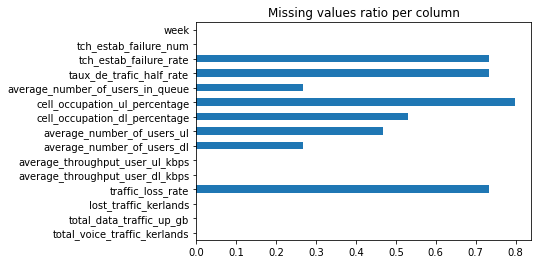

In [5]:
data.isna().sum().mul(1/len(data))[10:].plot(kind='barh')
plt.title('Missing values ratio per column')
plt.show()

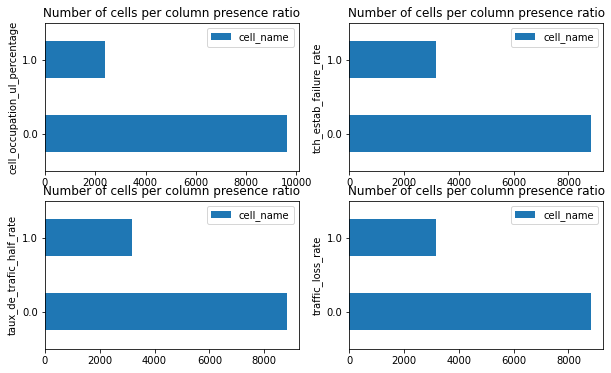

In [18]:
columns = ['cell_occupation_ul_percentage','tch_estab_failure_rate','taux_de_trafic_half_rate','traffic_loss_rate']
counts=[]
for column in columns : 
    
    df = pd.DataFrame(data.groupby('cell_name')[column].apply(lambda x: round(x.notnull().sum()/len(x),1)))
    s = df.reset_index().groupby(column).count()
    counts+=[s]
fig, axs = plt.subplots(2,2,figsize=(10,6))
for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        counts[i*2+j].plot(kind="barh",ax=ax)
        ax.set_title('Number of cells per column presence ratio')
plt.show()
    

## Outliered cells : total_data_traffic_dl_gb

In [21]:
stds = 6
serie = data.groupby(['cell_name']).total_data_traffic_dl_gb.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print (cell)

BARAMA2
BARANI1
BOURK21
BOURK22
BOUROU3
DAPELO2
DAPELO3
DASSA1
DASSA2
DASSA3
DIDYRG2
FOUTOU2
GOGO2
GOMBLO1
GOMBOR3
GOSSIN1
GOSSIN2
GOSSIN3
IMASGO2
IMASGO3
KDGCHU1
KDGCHU2
KDGCHU4
KDGCHU5
KDGEXC1
KDGEXC6
KINDI1
KINDI3
KOGO2
KONAN1
KONAN2
KONAN3
KORDIE1
KORDIE2
KORDIE3
KOUDFV1
KOUDO51
KOUDO52
KOUDO71
KOUDO72
KOUDO73
KOUDOC1
KOUDOC3
KOUDOP3
KOUDOS2
KOUDOS3
KOUDOU3
KOUKOU1
KOUKOU2
KOUKOU3
KOULB21
KUDGU61
KUDOU42
KYON1
KYON2
KYON3
MENEO1
MENEO3
MOGAND1
NABADO2
NABADO3
NANORO1
NANORO2
NANORO3
NARIOU1
NARIOU2
NATIAV1
ORONKU1
OUENGA2
OUGARO3
PABRE1
PABRE3
PELLA1
PELLA2
PELLA3
PENI2
PERKOA1
PERKOA2
PERKOA3
PERKOC1
POUNI1
POUNI2
POUNI3
RAMBO1
REO2
REO22
REO23
REO25
REO26
REO3
SAKOIN1
SAKOIN2
SAKOIN3
SALOGO2
SALOGO3
SANGHA1
SANGHA2
SANGHA3
SAPOUY1
SAPOUY2
SAPOUY3
SAYIRI1
SAYIRI2
SAYIRI3
SILLY1
STFELI1
STFELI2
STFELI3
TENADO1
TENADO2
TENKO21
TENKO22
TENKO23
TENKO31
TENKO32
TENKO33
TENKOD1
TENKOD2
TENKOD3
THION1
THION2
TIALGO3
TNKDG41
TNKDG42
TNKDG43
WAONGO1
WAYALG1
WAYALG2
WAYALG3
WBF0006
WBF0009


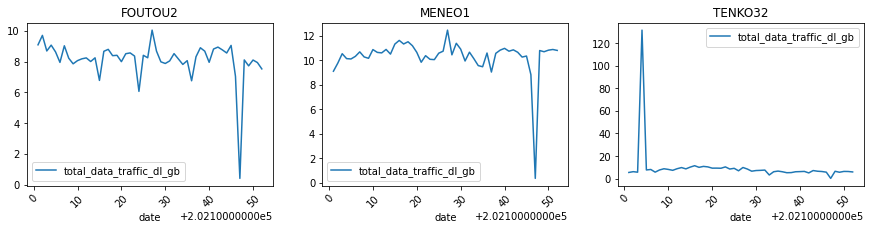

In [22]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['FOUTOU2', 'MENEO1', 'TENKO32']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','total_data_traffic_dl_gb']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


## Outliered cells : total_voice_traffic_kerlands

In [24]:
stds = 7
serie = data.groupby(['cell_name']).total_voice_traffic_kerlands.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print (cell)

BARAMA2
DASSA2
IMASGO3
KYON2
PELLA2
SAPOUY2
STFELI1
TENKO21
TENKO22
TENKO23
TENKO31
TENKO32
TENKO33
TENKOD1
TENKOD2
TENKOD3
THION1
THION2
TNKDG41
TNKDG42
TNKDG43
WAYALG1
WAYALG2
ZEGUED2
ZEGUED3


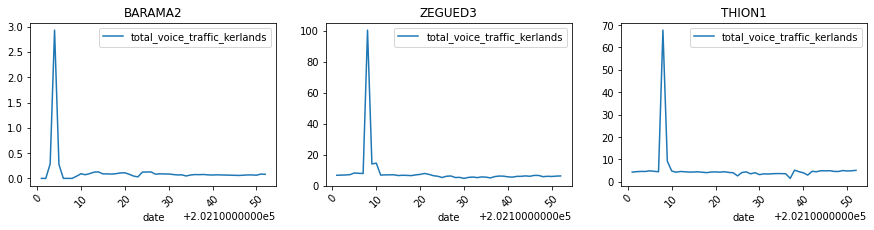

In [25]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['BARAMA2', 'ZEGUED3', 'THION1']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','total_voice_traffic_kerlands']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : cell_occupation_dl_percentage

In [30]:
stds = 7
serie = data.groupby(['cell_name']).cell_occupation_dl_percentage.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

ACCART2
ACCART3
ACRVL32
AEROP21
AEROPO2
ANDEMT2
ARBOLE2
BALEMB1
BANF151
BANF153
BANFO22
BANFO72
BANFOG3
BANFOR1
BANGAS2
BANGPO6
BANWAL1
BANWAL2
BANZON3
BAONOR1
BAONOR3
BARAKY3
BARAMA1
BARKAP1
BASSEM1
BASSEM2
BASSI3
BASSIN2
BELLB61
BELLB62
BELLB63
BELLB71
BENA3
BEREV3
BIKA3
BINDC33
BINDE4
BITTO21
BNRVL31
BNURVL2
BOB3101
BOB4101
BOBZI1
BOGOYA4
BOGOYA5
BOINS3
BONH51
BONNES2
BONNES3
BONZAN3
BORIB21
BORIB22
BORIBN2
BOST182
BOUERE1
BOULB1
BOULB2
BOULM22
BOULMI1
BOULMI2
BOULMI3
BOUNLE1
BOUROY1
BOUSOU2
CAMP_L1
CAMP_L3
CEK2
CFAO1
CHATEA3
CHUOHG1
CHUOHG2
CHUTEN2
CIMBUR1
CITEA21
CITEAZ2
CITEO2
CMA3
COLMA21
DAFRA2
DAGMO21
DAGMO23
DAGMON2
DAGMON3
DANO23
DAPOYA2
DARKOT2
DARSAL3
DASGH32
DASGH33
DDGUVT1
DEDOU42
DEDOU43
DEDOUG3
DEGUEL1
DJIGOM2
DODOUG3
DONONA2
DOSSI1
DOULOU1
DOULOU2
DOUNA3
ECHAN2
ECHAN3
ECHAO1
FADA43
FADA51
FADA53
FARAKA2
FO1
FOUTOU3
GALOPA2
GAOUAT1
GENET1
GNAFON1
GNAFON2
GNANGD1
GODYR3
GOUNGH3
GOURC21
GOURC22
GOURC23
HOUNDE2
HQ1
HTLDVL2
KADIOG1
KADIOG3
KALGO21
KALGO22
KALGO23
KAMBSE1
K

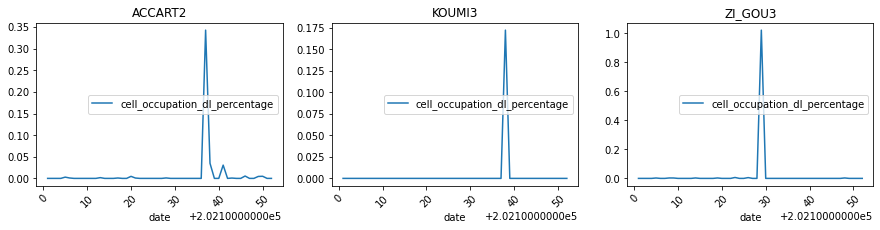

In [32]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['ACCART2', 'KOUMI3', 'ZI_GOU3']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','cell_occupation_dl_percentage']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : average_number_of_users_dl

In [35]:
stds = 6
serie = data.groupby(['cell_name']).average_number_of_users_dl.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

WBF0009
WBF0424
WBM1021
WBM1024
WBM1027


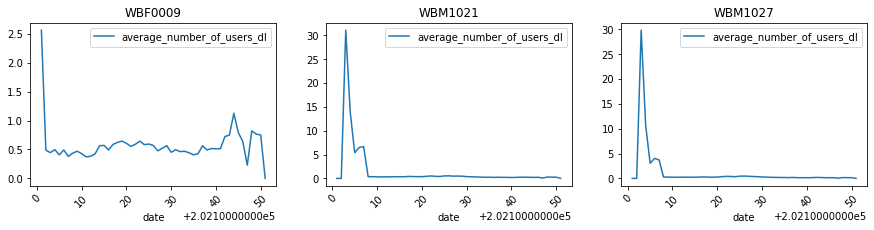

In [36]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['WBF0009', 'WBM1021', 'WBM1027']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','average_number_of_users_dl']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : tch_estab_failure_num

In [39]:
stds = 7
serie = data.groupby(['cell_name']).tch_estab_failure_num.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

ACCART2
ACCART3
ACRVL32
AEROP21
AEROPO2
ARBOLE2
BALEMB1
BANF151
BANF153
BANFO22
BANFOG3
BANFOR1
BANGAS2
BANWAL1
BANWAL2
BANZON3
BAONOR1
BAONOR3
BARAKY3
BARAMA1
BARAMA2
BARKAP1
BASSEM1
BASSEM2
BASSI1
BASSI3
BASSIN2
BELLB61
BELLB62
BELLB63
BELLB71
BELLB72
BENA3
BIKA3
BILGOT2
BINDC33
BITTO21
BNRVL31
BNURVL2
BOB3101
BOB4101
BOBO103
BOBZI1
BOGOYA4
BOGOYA5
BOINS3
BONH51
BONNES2
BONNES3
BONZAN3
BORIB21
BORIB22
BORIBN2
BOST182
BOUERE1
BOULB1
BOULB2
BOULB3
BOULM22
BOULMI1
BOULMI3
BOUNLE1
BOUROY1
BOUSOU2
BOUSS22
CAMP_L1
CEK2
CFAO1
CHATEA3
CHUOHG1
CHUOHG2
CHUTEN2
CIMBUR1
CITEA21
CITEA23
CITEAZ2
CITEO2
CLNNTR1
CMA3
COLMA21
DAFRA2
DAGMO21
DAGMO23
DAGMON2
DAGMON3
DANDE2
DAPOYA2
DARKOT2
DARSAL3
DASGH32
DASGH33
DDGUVT1
DEDOU42
DEDOU43
DEDOUG3
DEGUEL1
DIEBG2
DJIBO1
DJIGOM2
DJIPOL1
DJIPOL2
DODOUG3
DONONA2
DOSSI1
DOULOU1
DOULOU2
DOUNA3
ECHAN2
ECHAN3
ECHAO1
FADA22
FADA41
FADA43
FADA53
FARAKA2
FARKN23
FO1
FOUTOU3
GALOPA2
GAOUAT1
GENET1
GNAFON1
GNAFON2
GNANGD1
GODYR3
GONSE3
GOUNGH3
GOURC21
GOURC22
GOURC23
H

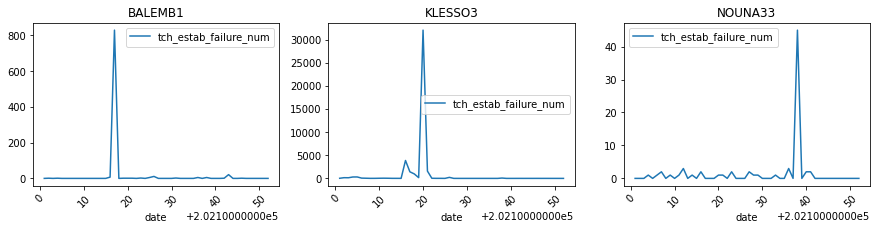

In [41]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['BALEMB1', 'KLESSO3', 'NOUNA33']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','tch_estab_failure_num']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : tch_estab_failure_rate

In [43]:
stds = 7
serie = data.groupby(['cell_name']).tch_estab_failure_rate.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

ACCART2
ACCART3
ACRVL32
AEROP21
AEROPO2
ANDEMT2
ARBOLE2
BALEMB1
BANF151
BANF153
BANFO22
BANFOG3
BANFOR1
BANGAS2
BANGPO6
BANWAL1
BANWAL2
BANZON3
BAONOR1
BAONOR3
BARAKY3
BARAMA1
BARKAP1
BASSEM1
BASSEM2
BASSI3
BASSIN2
BELLB61
BELLB62
BELLB63
BELLB71
BENA3
BEREV3
BIKA3
BINDC33
BITTO21
BNRVL31
BNURVL2
BOB3101
BOB4101
BOBZI1
BOGOYA4
BOGOYA5
BOINS3
BONH51
BONNES2
BONNES3
BONZAN3
BORIB21
BORIB22
BORIBN2
BOST182
BOUERE1
BOULB1
BOULB2
BOULM22
BOULMI1
BOULMI2
BOULMI3
BOUNLE1
BOUROY1
BOUSOU2
CAMP_L1
CAMP_L3
CEK2
CFAO1
CHATEA3
CHUOHG1
CHUOHG2
CHUTEN2
CIMBUR1
CITEA21
CITEAZ2
CITEO2
CMA3
COLMA21
DAFRA2
DAGMO21
DAGMO23
DAGMON2
DAGMON3
DANO23
DAPOYA2
DARKOT2
DARSAL3
DASGH32
DASGH33
DDGUVT1
DEDOU42
DEDOU43
DEDOUG3
DEGUEL1
DIEBO26
DJIGOM2
DODOUG3
DONONA2
DOSSI1
DOULOU1
DOULOU2
ECHAN2
ECHAN3
ECHAO1
FADA43
FADA51
FADA53
FARAKA2
FO1
FOUTOU3
GALOPA2
GAOUAT1
GENET1
GNAFON1
GNAFON2
GNANGD1
GODYR3
GOUNGH3
GOURC21
GOURC22
GOURC23
HOUNDE2
HQ1
HTLDVL2
KADIOG1
KADIOG3
KALGO21
KALGO22
KALGO23
KAMSAO2
KANAND2
KANTCH2

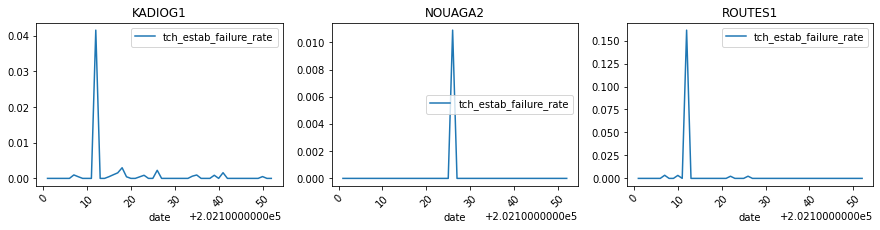

In [44]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['KADIOG1', 'NOUAGA2', 'ROUTES1']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','tch_estab_failure_rate']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : taux_de_trafic_half_rate

In [47]:
stds = 6
serie = data.groupby(['cell_name']).taux_de_trafic_half_rate.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

ACCARS2
SIAO31
TAMPY31


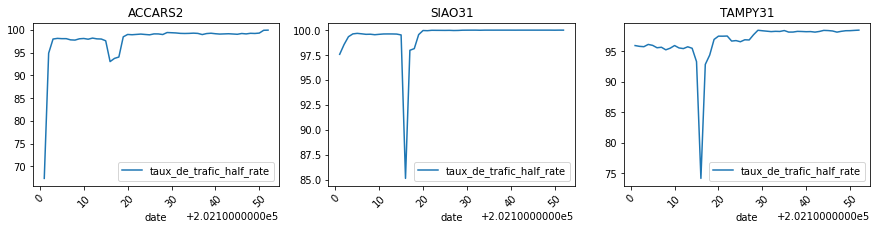

In [48]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['ACCARS2', 'SIAO31', 'TAMPY31']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','taux_de_trafic_half_rate']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [20]:
columns = ['cell_occupation_ul_percentage','tch_estab_failure_rate','taux_de_trafic_half_rate','traffic_loss_rate']
data[data.traffic_loss_rate == data.traffic_loss_rate].cell_band.unique()

array(['G900', 'G1800'], dtype=object)